## Analysis on Ames house pricing

ds?


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
Raw_data = pd.read_csv('train.csv', sep=',')

In [5]:
#preview the data
Raw_data.head(10)
Raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
Raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#preview data types
#Raw_data.dtypes.head(40)

#Data Types analysis
dtype = (Raw_data.dtypes).groupby(Raw_data.dtypes).count()
print('Data type summary:')
print(dtype)
Raw_data.info
#[1460 rows x 81 columns]


Data type summary:
int64      35
float64     3
object     43
dtype: int64


<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

# EDA on ameniti columns

The dataset has multiple fields for Basement, Porch, Poo, and Garage.    

- Q1: Do all houses have these amenities?
- Q2: Would a model more accurately predict price with more info on the amenities, or would it be better if only one variable was used to indicate the house has the amenity?


In [9]:

#create a function to group and analyse key amenity features
Basementcols = []
Garagecols = []
Poolcols = []
Porchcols = []
for col in Raw_data.columns:
    
    if 'Bsmt' in col:
        Basementcols.append(col)
    elif 'Garage' in col:
        Garagecols.append(col)
    elif 'Pool' in col:
        Poolcols.append(col)
    elif 'Porch' in col:
        Porchcols.append(col)
    else: continue

#created a list of column *name lists to loop through and count how many houses have these. 
#would grouping the features columns improve the model? how influential would detaiils of features be on house pricing? 
#is it possible to access the name of a list?
Grouped_features = [Basementcols, Garagecols, Poolcols, Porchcols]
for i in Grouped_features:
    print('Number of columns:' + str(len(i)))
    print(i)
    
print("-------------------")
#print sample data for each column group

for group in Grouped_features:
    print(Raw_data[group].head(10))

#print(Raw_data[Basementcols].sort_values(by ='BsmtUnfSF', ascending=True).head(10))




Number of columns:11
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
Number of columns:7
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
Number of columns:2
['PoolArea', 'PoolQC']
Number of columns:4
['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
-------------------
  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   
5       Gd       TA           No          GLQ         732          Unf   
6       Ex       TA           Av  

In [10]:
#COunt how many houses have each amenity
#Basement will be determined by BsmtQual 
#Garage will be determined by GarageQual
#Pool will be determined by PoolQC
#Porch will be determined by counting where all features = 0

for column in ['BsmtQual', 'GarageQual', 'PoolQC']:
    count_null = Raw_data[column].isna().sum()
    print('Number of houses without {}: {}'.format(column, count_null ))

#Count of houses without porch:
noporch = ((Raw_data['OpenPorchSF'] == 0) & 
           (Raw_data['EnclosedPorch'] == 0) & 
           (Raw_data['ScreenPorch'] == 0) & 
           (Raw_data['3SsnPorch'] == 0)).sum()

print('Number of Homes without a porch: {}'.format(noporch))
    

#--------------------------------------------

Bsmtfilter = (Raw_data['BsmtFinType1'].isna())
NoBsmtFilt = Raw_data.loc[Bsmtfilter]
#missing count :

missing_count = Raw_data['BsmtFinType1'].isna().sum()
print(f"Count of missing values in 'BsmtFinType1': {missing_count}")

print(Raw_data['BsmtFinType1'].isna().sum())




Number of houses without BsmtQual: 37
Number of houses without GarageQual: 81
Number of houses without PoolQC: 1453
Number of Homes without a porch: 458
Count of missing values in 'BsmtFinType1': 37
37


### Result from above code:
Number of houses without BsmtQual: 37   
Number of houses without GarageQual: 81   
Number of houses without PoolQC: 1453   
Number of Homes without a porch: 458   
Count of missing values in 'BsmtFinType1': 37   
37

# Visual Analysis

## Note: EDA on 80 columns is taxing and none of these visualizations were used. Skip to 'Missing Values' section

In [ ]:
#---------

print('Basic Analysis:')
Raw_data.head(10)
Raw_data.describe()

#Questions to answer: 
#distribution of prices, year built, year remodeled, Lot area, year sold, month sold, YearRemodAdd, FullBath, HalfBath, BedroomAbvGr
cols1 = ['Id', 'SalePrice', 'LotArea', 'YearBuilt',
              'YearRemodAdd', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
               'MiscVal', 'MoSold', 'YrSold']

Raw_data[cols1].describe()


In [ ]:
#graphs to visualize data
Raw_data.hist(column = cols1[1:5], bins = 20)

In [ ]:
Raw_data.hist(column = cols1[5:9], bins = 20)

In [ ]:
Raw_data.hist(column = cols1[9:13], bins = 20)

In [ ]:
Raw_data.hist(column = cols1[13:15])

In [ ]:
#Calculating correlation
print(Raw_data[cols1].corr())

In [19]:
Raw_data.corr(method='spearman', numeric_only = True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,-0.006736,-0.009509,-0.033187,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,0.025888,-0.013644,-0.000194,0.013301,0.006505,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.165825,0.019480,0.079268,0.024226,-0.047133,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,0.052516,0.119436,0.386206,0.427678,0.055111,-0.030230,0.375844,0.085990,-0.003854,0.220234,0.096777,0.327679,0.002231,0.365999,0.245315,0.115694,0.351756,0.378052,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,0.072019,0.077830,0.366197,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.405924,0.350198,0.041796,0.340195,0.367153,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,-0.117560,0.272939,0.459915,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.427806,0.420626,0.618193,0.608756,0.541552,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,0.102471,-0.128270,-0.217375,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.104919,-0.045383,-0.379398,-0.254763,-0.200718,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,-0.111692,0.139014,0.427187,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.176820,0.174655,0.890546,0.601519,0.528281,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,-0.126086,0.176921,0.299042,0.240265,0.073049,-0.064542,0.282400,0.099904,-0.031495,0.431390,0.151562,-0.054371,-0.154208,0.198243,0.119270,0.722377,0.456245,0.398267,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,-0.061342,0.075561,0.360104,0.352351,0.063162,-0.106994,0.322678,0.121004,0.032870,0.290366,0.168776,0.113137,-0.049387,0.263912,0.255627,0.305964,0.401606,0.364755,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,0.050398,-0.573638,0.410413,0.323478,-0.191236,-0.079054,0.057471,0.674175,0.090712,0.011986,-0.013907,-0.084164,-0.106369,-0.050062,0.192264,0.078935,0.181381,0.244161,0.179359,0.081420,-0.148339,0.046802,0.

In [20]:
#missing values
#with pd.option_context('display.max_columns', 82):
    #display(Raw_data.query('BsmtQual.isna()'))


In [21]:
#Check for outliers in SalePrice using z-score function
def calc_z(df,col):
    mean = df[col].mean()
    std = df[col].std()
    return(df[col]-mean)/std
Raw_data.pipe(calc_z, col= 'SalePrice')

0       0.347154
1       0.007286
2       0.535970
3      -0.515105
4       0.869545
          ...   
1455   -0.074534
1456    0.366036
1457    1.077242
1458   -0.488356
1459   -0.420697
Name: SalePrice, Length: 1460, dtype: float64

In [22]:
outliers = Raw_data.assign(z_score = calc_z(Raw_data, col ='SalePrice')).query('z_score.abs() >=3').sort_values(by='z_score', ascending = True)
with pd.option_context('display.max_columns', 82):
    display(outliers)


outliers.shape



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,z_score
664,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,Y,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005.0,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000,3.047220
1142,1143,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,340.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1150,Unf,0,316,1466,GasA,Ex,Y,SBrkr,1466,1362,0,2828,1,0,3,0,4,1,Gd,11,Typ,1,TA,BuiltIn,2006.0,RFn,3,1052,TA,TA,Y,125,144,0,0,0,0,NaN,NaN,NaN,0,4,2007,New,Partial,424870,3.070759
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280,Unf,0,402,1682,GasA,Ex,Y,SBrkr,1742,590,0,2332,1,0,2,1,3,1,Ex,9,Typ,1,Ex,BuiltIn,2008.0,Fin,3,846,TA,TA,Y,196,134,0,0,0,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000,3.084983
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,3228,0,0,3228,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000,3.135334
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,870.0,Ex,TA,PConc,Ex,TA,No,GLQ,1410,Unf,0,438,1848,GasA,Ex,Y,SBrkr,1848,880,0,2728,1,0,2,1,4,1,Ex,10,Typ,2,Ex,Attchd,2006.0,Fin,3,706,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154,3.225387
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780,3.245854
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,304.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1350,Unf,0,626,1976,GasA,Ex,Y,SBrkr,1976,0,0,1976,1,0,2,0,2,1,Gd,7,Typ,1,Ex,Attchd,2006.0,RFn,3,908,TA,TA,Y,250,63,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000,3.261212
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,268.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1330,Unf,0,122,1452,GasA,Ex,Y,SBrkr,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,Typ,1,Gd,Attchd,2008.0,Fin,3,858,TA,TA,Y,126,66,0,0,0,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261,3.340023
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008.0,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950,3.411635
1243,1244,20,RL,107.0,1389

(22, 82)

<Axes: >

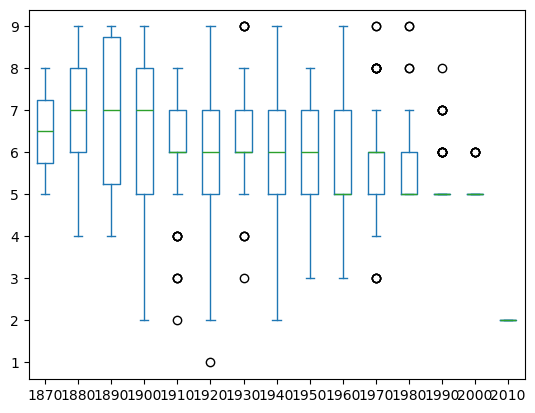

In [23]:
#Bpx plot of overall quality and year built

(Raw_data
 .assign(decade=(Raw_data['YearBuilt']//10) *10)  #creates new column that categorizes YrSOld by decade
 .pivot(columns = 'decade', values = 'OverallCond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop = True))
 .plot.box()
       )    

In [24]:
#cross tabulation zone and overalll quality then year built and overall quality. Use the following functions:
# .groupby, .size, . unstack
# or use pd.crosstab

# Missing Values

In [26]:
#check for missing data
with pd.option_context('display.max_rows', 82):
    display(Raw_data.isna().any().sort_values(ascending = False))




FireplaceQu       True
Fence             True
BsmtFinType1      True
GarageQual        True
BsmtFinType2      True
BsmtCond          True
BsmtQual          True
GarageFinish      True
PoolQC            True
MiscFeature       True
GarageCond        True
GarageYrBlt       True
MasVnrType        True
Alley             True
MasVnrArea        True
Electrical        True
LotFrontage       True
GarageType        True
BsmtExposure      True
Id               False
Functional       False
Fireplaces       False
KitchenQual      False
KitchenAbvGr     False
BedroomAbvGr     False
HalfBath         False
FullBath         False
BsmtHalfBath     False
TotRmsAbvGrd     False
GarageCars       False
GrLivArea        False
GarageArea       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleConditi

In [27]:
#the following features have missing data
cols_na = Raw_data.isna().any().loc[lambda x: x == True]
cols_na

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [28]:
#get datatypes for columns with missing values
cols_na2 = Raw_data.isna().any().loc[lambda x: x].index.tolist()
Raw_data[cols_na2].dtypes
#cols_na2

#to correct for missing values for int features, add 0 except for GarageYrBuilt. this field would be difficult to correct for and use in liniar regression. 


LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [29]:
#create a variable with only categorical features
colsctg = Raw_data[cols_na2].dtypes.loc[Raw_data[cols_na2].dtypes =='object'].index.tolist()
Raw_data[colsctg]
colsctg


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [30]:
#check missing values for categorical variables
for col in colsctg:
    countNaN = Raw_data[col].isna().sum()
    print(Raw_data[col].value_counts())
    print('# Missing Values:' + str(countNaN))
    print('------------------')

#looks like no missing data is represented by a string. 


Alley
Grvl    50
Pave    41
Name: count, dtype: int64
# Missing Values:1369
------------------
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
# Missing Values:872
------------------
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
# Missing Values:37
------------------
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
# Missing Values:37
------------------
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
# Missing Values:38
------------------
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
# Missing Values:37
------------------
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
# Missing Values:38
------------------
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
# Missing Values:1
-------------

In [31]:
#
#function to replace all missing values with 'NA'
for col in cols_na2:
    if Raw_data[col].dtypes == 'object':
        Raw_data[col] = Raw_data[col].fillna('Not Applicable')
    else:
        Raw_data[col] = Raw_data[col].fillna(0)



In [32]:
#check that there are no missing values for linear regression

with pd.option_context('display.max_rows',82):
    display(Raw_data.isna().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

## Label Encoder for Regressions and Scaled Dataset

In [34]:
from sklearn.preprocessing import LabelEncoder

# Assume 'Raw_data' is your DataFrame
catcols = list(Raw_data.select_dtypes('object').columns) 

le = LabelEncoder()

encdata = Raw_data.copy()

# Apply label encoding to each categorical column
for col in catcols:
    encdata[col] = le.fit_transform(encdata[col])

# Check the result
#with pd.option_context('display.max_rows', None):
 #   display(encdata.dtypes)

#check that there are no missing values in the encoded data
#with pd.option_context('display.max_rows', 82):
 #   display(encdata.isna().any().sort_values(ascending = False))


###################################3
#create dataset that has been label encoded and scaled for linear regressions.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(encdata), columns = encdata.columns )



#                  LINEAR REGRESSION                #


Leverageing RXBoost linear regressor to calculate weight of all variables except for GarageYrBlt. RXBoost linear regressor takes in non-numeric values. 

test.csv has all features except for Saleprice. Sample_submission.csv contains the Saleprices for the test.csv. In order to narrow 

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [37]:

## Running XGBoost with scaled data vs unscaled data. 
def xgbreg(Xtrain, Xtest, ytrain, ytest, parameters, **kwargs):
    
    reg = xgb.XGBRegressor(**parameters)
    reg.fit(Xtrain, ytrain)
    codscore = reg.score(Xtest, ytest)
    #Create feature importances series
    feature_w = pd.Series(reg.feature_importances_, index = reg.feature_names_in_).sort_values(ascending = False)
    top15f = feature_w[:15]
    top15ls = top15f.index.tolist()
    print(f'The Coefficient of determination: {codscore}' )
    print('Top 15 features:')
    print(top15f)
    print(top15ls)


#Raw data includes categorical features.
x = (Raw_data.assign(**Raw_data.select_dtypes('object').astype('category'))).drop(columns = 'SalePrice')
y = Raw_data.SalePrice
#Recorded score for Rawdata model is 0.8965712970374827

Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, random_state=42)
Raw_Data_Params = {'enable_categorical' : True, 'tree_method':'hist'}
xgbreg(Xtrain, Xtest, ytrain, ytest, Raw_Data_Params)

#The Coefficient of determination: 0.8951997164140458



#Run XGBoost with scaled/encoded data (scaled_df)
x0 = scaled_df.drop(columns = 'SalePrice')
y0 = scaled_df.SalePrice

Xtrain0, Xtest0, ytrain0, ytest0 = train_test_split(x0,y0, random_state=42)
xgbreg(Xtrain0, Xtest0, ytrain0, ytest0, {})

#The Coefficient of determination: 0.8951997164140458

#There is virtually no difference between the two CoDs. 


The Coefficient of determination: 0.8965712970374827
Top 15 features:
OverallQual     0.507263
GarageCars      0.177976
GrLivArea       0.045854
CentralAir      0.022375
ExterQual       0.021727
TotalBsmtSF     0.016100
Neighborhood    0.015084
BsmtFinSF1      0.014488
2ndFlrSF        0.012692
BsmtQual        0.012111
LandContour     0.011963
1stFlrSF        0.010971
GarageFinish    0.009634
KitchenQual     0.008770
TotRmsAbvGrd    0.008491
dtype: float32
['OverallQual', 'GarageCars', 'GrLivArea', 'CentralAir', 'ExterQual', 'TotalBsmtSF', 'Neighborhood', 'BsmtFinSF1', '2ndFlrSF', 'BsmtQual', 'LandContour', '1stFlrSF', 'GarageFinish', 'KitchenQual', 'TotRmsAbvGrd']
The Coefficient of determination: 0.8959931756188757
Top 15 features:
OverallQual     0.544447
GarageCars      0.062222
GrLivArea       0.042631
CentralAir      0.041868
BsmtQual        0.030682
KitchenAbvGr    0.027505
LandContour     0.022101
2ndFlrSF        0.018924
TotalBsmtSF     0.014461
GarageType      0.013013
BsmtFin

## Additional Regressions: Lasso, Ridge, KNest, 

will be using the scales/encoded dataset

The Mean Squared Error for the Lasso() is 1.1123446035290037
The Coefficient of Determination for the Lasso() regression is -0.0014293725084046915
The top 15 coefficient scores are:
Id             -0.0
MSSubClass     -0.0
GarageType     -0.0
FireplaceQu    -0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual    -0.0
KitchenAbvGr   -0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath   -0.0
BsmtFullBath    0.0
GrLivArea       0.0
dtype: float64
Prediction Error plot for Lasso


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


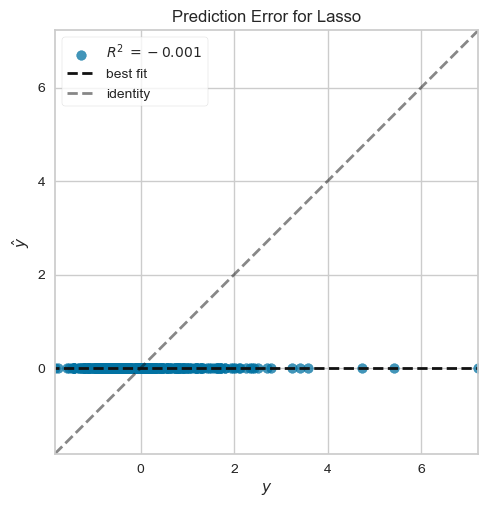

Residuals plot for Lasso


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


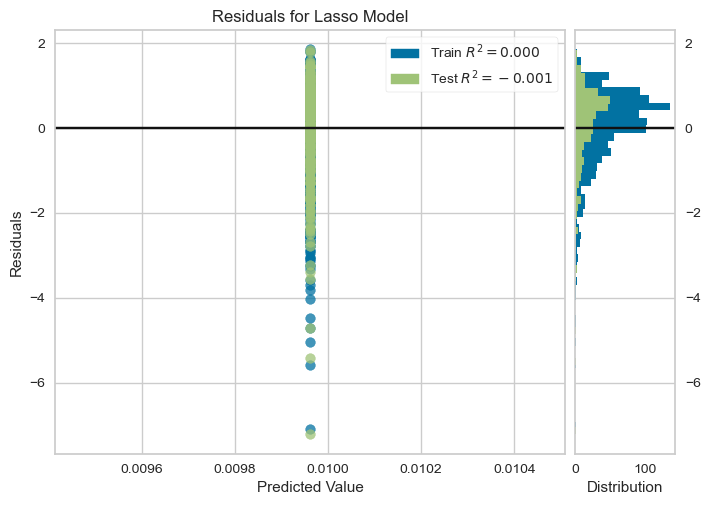

KFold Cross Validation for Lasso


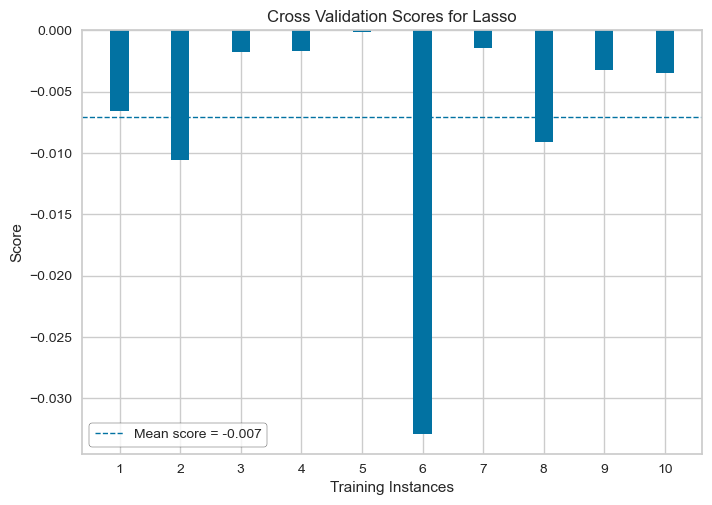

The Mean Squared Error for the Ridge() is 0.1738028586545523
The Coefficient of Determination for the Ridge() regression is 0.8435275479105995
The top 15 coefficient scores are:
OverallQual     0.190810
GrLivArea       0.157858
GarageCars      0.138122
1stFlrSF        0.105406
2ndFlrSF        0.098653
TotRmsAbvGrd    0.088583
YearBuilt       0.087857
OverallCond     0.073957
MasVnrArea      0.056496
BsmtFullBath    0.053787
Functional      0.051443
Fireplaces      0.045941
LotArea         0.040064
LandSlope       0.037917
RoofMatl        0.036941
dtype: float64
Prediction Error plot for Ridge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


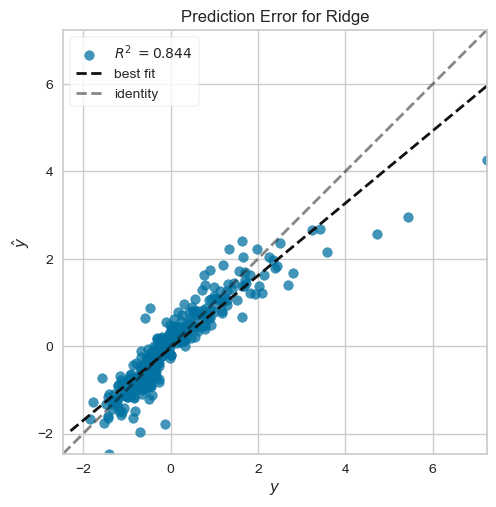

Residuals plot for Ridge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


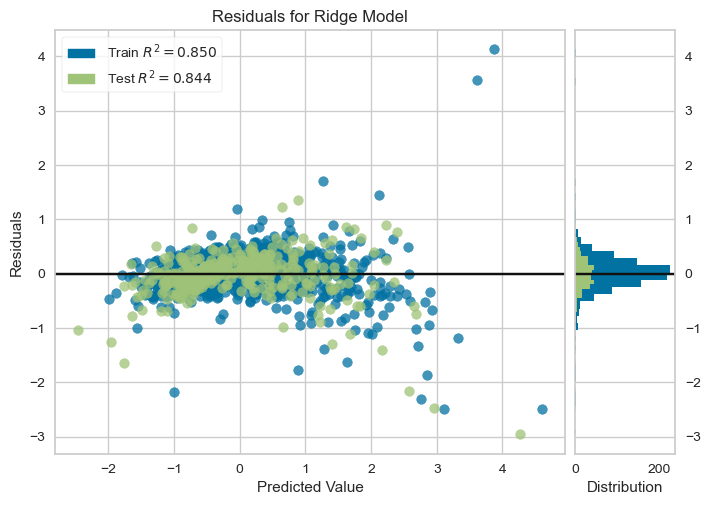

KFold Cross Validation for Ridge


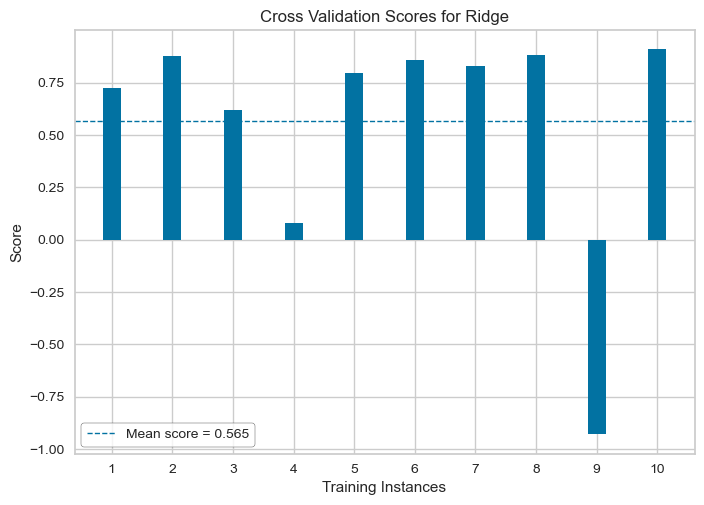

The Mean Squared Error for the BayesianRidge() is 0.1675061162103326
The Coefficient of Determination for the BayesianRidge() regression is 0.849196423198668
The top 15 coefficient scores are:
OverallQual     0.181920
GrLivArea       0.136898
GarageCars      0.110489
2ndFlrSF        0.089274
1stFlrSF        0.086994
TotRmsAbvGrd    0.086752
OverallCond     0.062708
YearBuilt       0.060255
MasVnrArea      0.055353
Fireplaces      0.051526
BsmtFullBath    0.049956
Functional      0.047633
LotArea         0.038037
LandSlope       0.037702
ScreenPorch     0.035756
dtype: float64
Prediction Error plot for BayesianRidge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


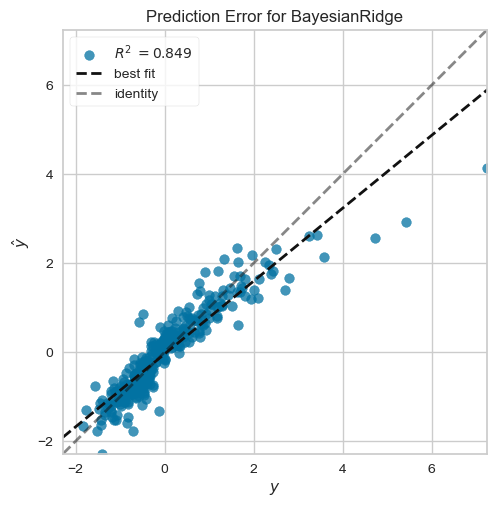

Residuals plot for BayesianRidge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


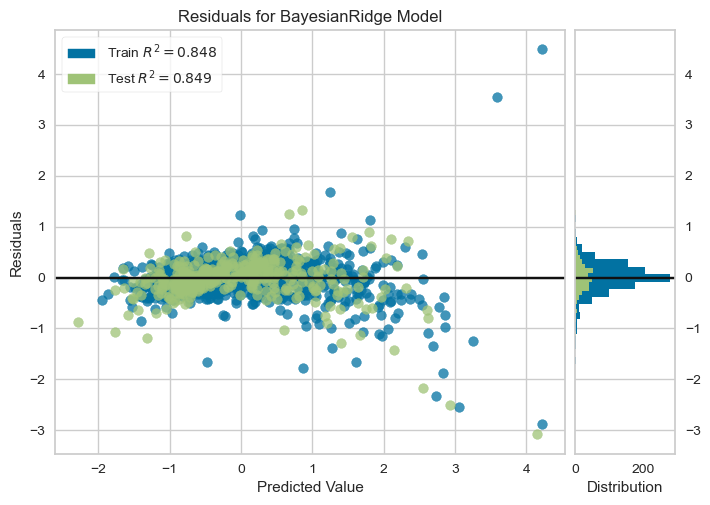

KFold Cross Validation for BayesianRidge


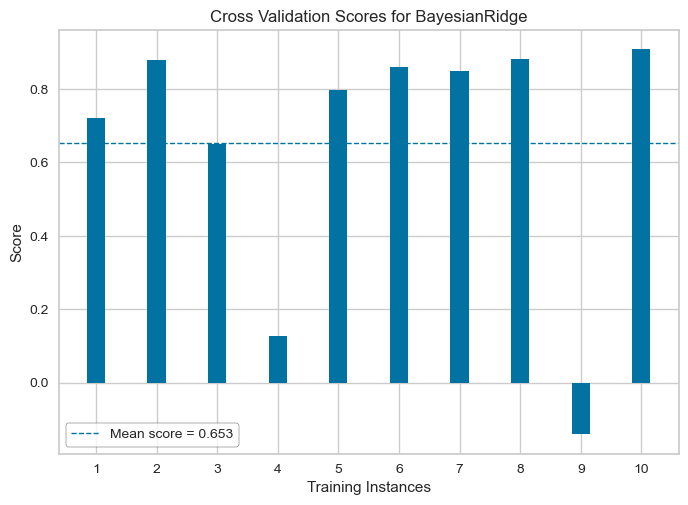

The Mean Squared Error for the KNeighborsRegressor() is 0.24467100489781018
The Coefficient of Determination for the KNeighborsRegressor() regression is 0.779725877998179
The model KNeighborsRegressor() does not have coefficients.
Prediction Error plot for KNeighbors


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


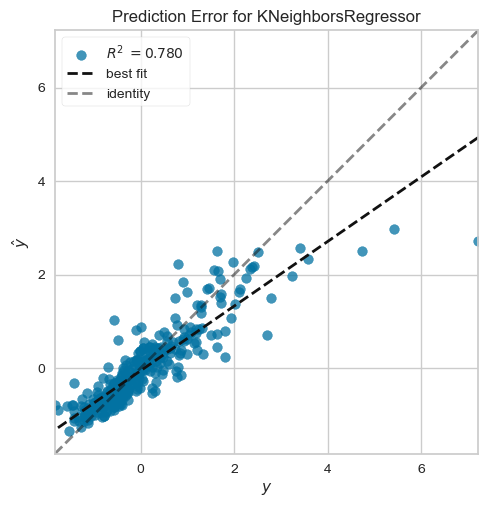

Residuals plot for KNeighbors


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


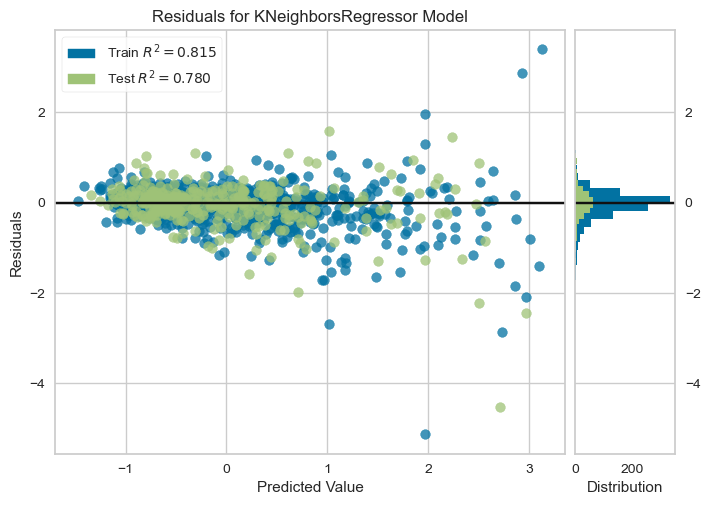

KFold Cross Validation for KNeighbors


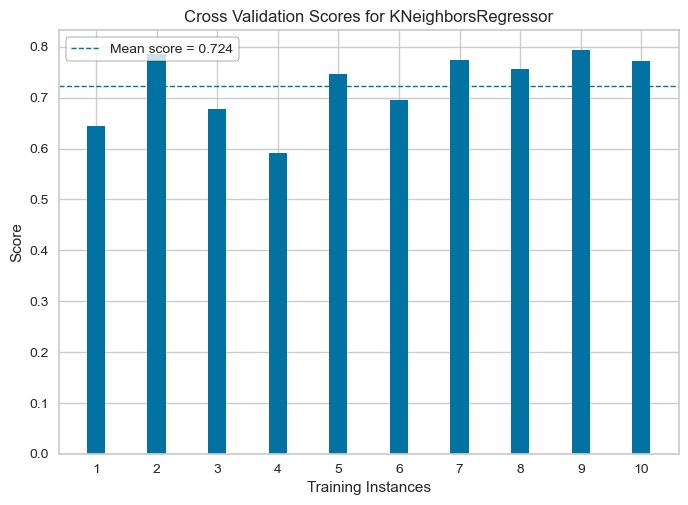

The Mean Squared Error for the RandomForestRegressor() is 0.11697422491882616
The Coefficient of Determination for the RandomForestRegressor() regression is 0.8946896273974123
The model RandomForestRegressor() does not have coefficients.
Prediction Error plot for RandomForestRegressor


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


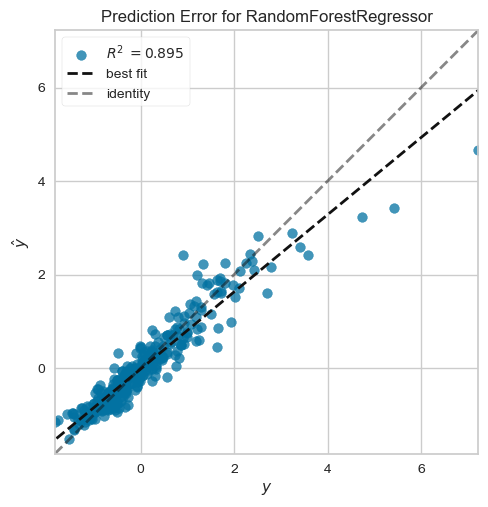

Residuals plot for RandomForestRegressor


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


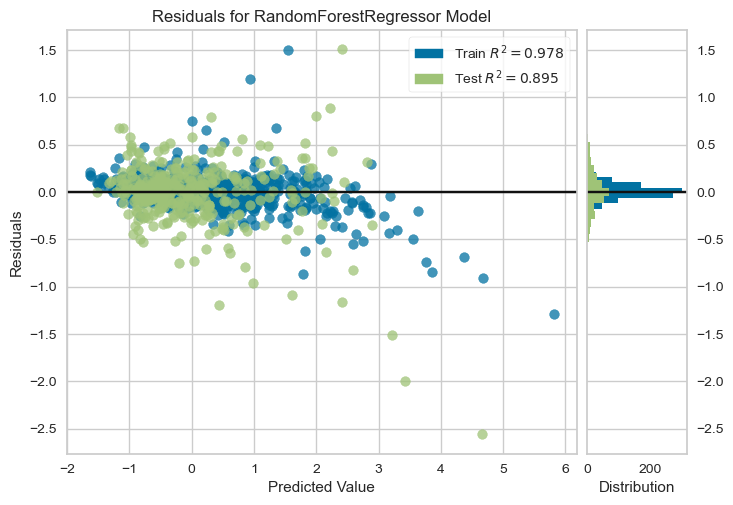

KFold Cross Validation for RandomForestRegressor


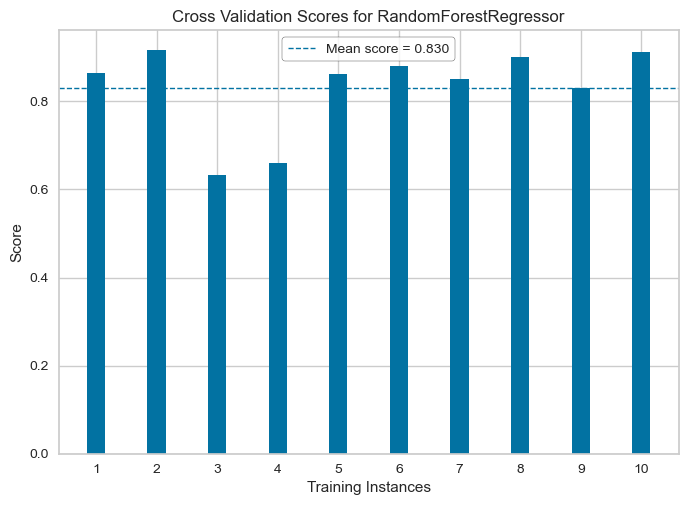

{'Lasso': {'MSE': 1.1123446035290037, 'CoeffDetermination': -0.0014293725084046915}, 'Ridge': {'MSE': 0.1738028586545523, 'CoeffDetermination': 0.8435275479105995}, 'BayesianRidge': {'MSE': 0.1675061162103326, 'CoeffDetermination': 0.849196423198668}, 'KNeighbors': {'MSE': 0.24467100489781018, 'CoeffDetermination': 0.779725877998179}, 'RandomForestRegressor': {'MSE': 0.11697422491882616, 'CoeffDetermination': 0.8946896273974123}}


In [39]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor #visualizer?
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#xgbregressor does not support coef_ through .fit() needs to go through

####Model Evaluation + visualizers
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import KFold



def modelEval(model, modelname, Xtrain, Xtest, ytrain, ytest):
    
   #Prediction Error model evaluation
    print(f'Prediction Error plot for {modelname}')
    predError = PredictionError(model)
    predError.fit(Xtrain, ytrain)
    predError.score(Xtest, ytest)
    predError.show()

    #Residulas Plot
    print(f'Residuals plot for {modelname}')
    redPlot = ResidualsPlot(model)
    redPlot.fit(Xtrain, ytrain)
    redPlot.score(Xtest, ytest)
    redPlot.show()

    #Cross Validation
    print(f'KFold Cross Validation for {modelname}')
    Kf = KFold(n_splits = 10)
    cvviz = CVScores(model, cv = Kf)
    cvviz.fit(Xtrain,ytrain)
    cvviz.show()
    
    
    

models = {'Lasso':Lasso(), 'Ridge': Ridge(),'BayesianRidge': BayesianRidge(), 'KNeighbors':KNeighborsRegressor(), 
          'RandomForestRegressor': RandomForestRegressor() }

#add Mean Squared Error using predict()

def regressions(reg, regname, Xtrain, Xtest, ytrain, ytest):
    model = reg
    model_name = str(reg)
    model.fit(Xtrain, ytrain)
    score = model.score(Xtest, ytest)
    ypred = model.predict(Xtest)
    mse = mean_squared_error(ytest, ypred)
    print(f'The Mean Squared Error for the {model_name} is {mse}')
    try:
        # Attempt to access coef_
        f_ranks = pd.Series(model.coef_, index=model.feature_names_in_).sort_values(ascending=False)
        print(f'The Coefficient of Determination for the {model_name} regression is {score}')
        print('The top 15 coefficient scores are:')
        print(f_ranks[:15])
    except AttributeError:
        # If coef_ is not available (e.g., for KNeighborsRegressor)
        print(f'The Coefficient of Determination for the {model_name} regression is {score}')
        print(f'The model {model_name} does not have coefficients.')
    
    scoresls = {'MSE': mse, 'CoeffDetermination': score}

    return scoresls
    #f_ranks = pd.Series(model.coef_, index = model.feature_names_in_).sort_values(ascending = False)
    #print(f'The Coefficient of Determinaiton for the {model_name} regression is {score}')
    #print(f_ranks[:15])


#Create a Dictionary that stores the mse and CoD for each regressor using all 80 features
scores80vars = {}
for k, v in models.items():
    scores_dict = regressions(v, k, Xtrain0, Xtest0, ytrain0, ytest0)
    scores80vars[k] = scores_dict
    modelEval(v, k, Xtrain0, Xtest0, ytrain0, ytest0)

print(scores80vars)
# COmpare scores80vars with scores26vars scores (Tabulate once features are narrowed down)

### Results:
Based on the R2 score for the regressions, The Ridge regression seems to fit best while the Lasso regression seens to not fit. 


## Feature Engineering: Narrow down # of Features

In [42]:
#K best decision tree:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from yellowbrick.features import FeatureImportances


classifiers = {'SelectKBest': SelectKBest(k = 15), 'RandomForestRegressor': RandomForestRegressor(), 
               'GradientBoostingRegressor': GradientBoostingRegressor(), 'XGBRegressor': xgb.XGBRegressor() }


Xen = encdata.drop(columns = 'SalePrice')
yen = encdata['SalePrice']

#Xen_train, Xen_test, yen_train, yen_test = train_test_split(Xen, yen, random_state = 42)

def selectfeatures(classifier,classifier_name, x,y):
    cls = classifier
    cls.fit(x,y)
    cls_name = classifier_name
    topfeatures = None
#scores
    try:
        
        index = cls.get_support(indices = True)
        scores = cls.scores_
        cols = x.columns.tolist()
        
        topscores = [scores[i] for i in index]
        features = [cols[i] for i in index]
        topfeatures = pd.DataFrame({'Top 15 Features': features, 'Importance Scores': topscores}).sort_values(by = 'Importance Scores', ascending = False)
        
        print(f'The top 15 features by coefficient value for the {cls_name} model are:')
        print(topfeatures)
        
        
    except (AttributeError, ValueError) as e:
        
        topscores = pd.DataFrame({'Top 15 Features':x.columns.tolist(), 'Importance Scores': cls.feature_importances_.tolist()}).sort_values(by = 'Importance Scores', ascending = False)
        topfeatures = topscores.sort_values(by = 'Importance Scores', ascending = False ).head(15)
        print(f'The top 15 features by feature importances for the {cls_name} model are:')
        print(topfeatures)

        Coef_determination = cls.score(x,y)
        print(f'The Coefficient of Determination for the {cls_name} model is: {Coef_determination}')


        #vizualizer = FeatureImportances(cls)
        #vizualizer.fit(x,y)
        #featimp = vizualizer.feature_importances_
        #print(featimp)
        #vizualizer.show()
    ##### Find common 
    return topfeatures
print(x0.shape)
print(y0.shape)

# create a dictionary of models used for feature engineering to store score (if available)
#and the top 15 scoring features and their scores, 



############ Find the comm
features_df = pd.DataFrame(columns = ['Top 15 Features', 'Importance Scores', 'Model'])
for name, model in classifiers.items():
    topfeatures = selectfeatures(model, name, x0,y0) #returns a 2D dataframe
    topfeatures['Model'] = name 
    #print(topfeatures.head())
    features_df = pd.concat([features_df, topfeatures], ignore_index = True)
    #features_df = pd.concat([features_df,topfeatures, model_series ], ignore_index = True)
    
    #features_dict[name] = {'Top Features': topfeatures} #scratch creating a dictionary.m going to create df with all features chosen for each model
    #with a third column referring to the model
    
#features_df = pd.DataFrame(features_dict)
#print(features_df)

(1460, 80)
(1460,)
The top 15 features by coefficient value for the SelectKBest model are:
   Top 15 Features  Importance Scores
1      OverallQual           5.729183
4        ExterQual           3.774880
14         MiscVal           3.756250
8        GrLivArea           3.435110
0          LotArea           3.285852
10     KitchenQual           2.904745
12      GarageCars           2.861594
9         FullBath           2.678847
13      GarageArea           2.583341
5         BsmtQual           2.485452
7         1stFlrSF           2.338620
6      TotalBsmtSF           2.315290
2        YearBuilt           2.310198
3       MasVnrArea           1.991329
11    TotRmsAbvGrd           1.873132


C:\Users\Valen\AppData\Local\Temp\ipykernel_8252\3709656957.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, topfeatures], ignore_index = True)


The top 15 features by feature importances for the RandomForestRegressor model are:
   Top 15 Features  Importance Scores
17     OverallQual           0.581203
46       GrLivArea           0.109180
38     TotalBsmtSF           0.041166
44        2ndFlrSF           0.035296
34      BsmtFinSF1           0.029922
43        1stFlrSF           0.020727
61      GarageCars           0.018969
62      GarageArea           0.014339
4          LotArea           0.012053
54    TotRmsAbvGrd           0.010111
19       YearBuilt           0.009789
12    Neighborhood           0.007575
20    YearRemodAdd           0.006759
59     GarageYrBlt           0.005703
3      LotFrontage           0.005550
The Coefficient of Determination for the RandomForestRegressor model is: 0.9827867203569837
The top 15 features by feature importances for the GradientBoostingRegressor model are:
   Top 15 Features  Importance Scores
17     OverallQual           0.533754
46       GrLivArea           0.120053
38     TotalBs

Top Features Comparison
<class 'pandas.core.frame.DataFrame'>
  Top 15 Features  Importance Scores        Model
0     OverallQual           5.729183  SelectKBest
1       ExterQual           3.774880  SelectKBest
2         MiscVal           3.756250  SelectKBest
3       GrLivArea           3.435110  SelectKBest
4         LotArea           3.285852  SelectKBest


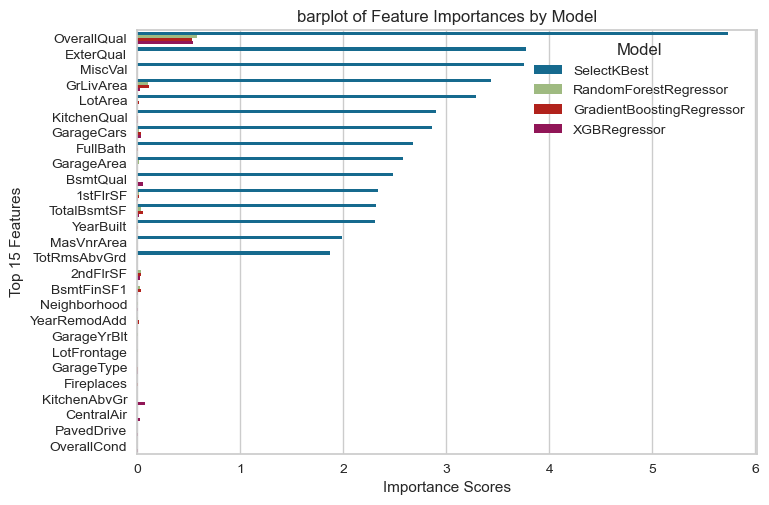

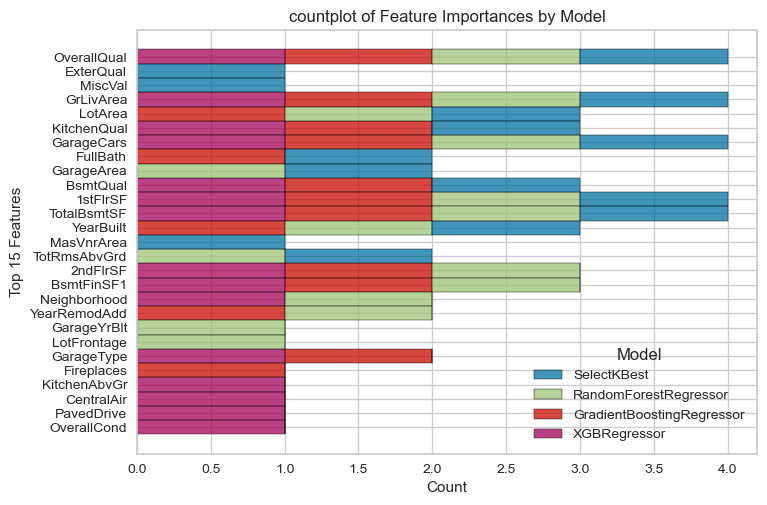

Model,GradientBoostingRegressor,RandomForestRegressor,SelectKBest,XGBRegressor,ORank
Top 15 Features,,,,,
1stFlrSF,0.021658,0.020727,2.338620,0.007541,4
TotalBsmtSF,0.060451,0.041166,2.315290,0.017763,4
OverallQual,0.533754,0.581203,5.729183,0.541738,4
GarageCars,0.040364,0.018969,2.861594,0.041993,4
GrLivArea,0.120053,0.109180,3.435110,0.032007,4
2ndFlrSF,0.038132,0.035296,NaN,0.026928,3
BsmtFinSF1,0.034542,0.029922,NaN,0.009079,3
BsmtQual,0.012946,NaN,2.485452,0.058505,3
YearBuilt,0.011670,0.009789,2.310198,NaN,3


In [43]:
# feature comparison viz

print('Top Features Comparison')
print(type(features_df))
print(features_df.head(5))



plt.figure()
bp = sns.barplot(features_df, y = 'Top 15 Features', x = 'Importance Scores', hue = 'Model')
plt.title('barplot of Feature Importances by Model')
plt.show()

plt.figure()
cp = sns.histplot(data = features_df, y = 'Top 15 Features', hue = 'Model', multiple = 'stack')
plt.title('countplot of Feature Importances by Model')
plt.show()
#scatter
#pivot table
###Add correlation

pivottopfeatures = pd.DataFrame(pd.pivot_table(features_df, index = 'Top 15 Features', columns = 'Model', values = 'Importance Scores'))
pivottopfeatures['ORank'] = 4
for index, row in pivottopfeatures.iterrows():
    for col in pivottopfeatures.columns:
        if pd.isnull(row[col]):  # Check for NaN values
            pivottopfeatures.at[index, 'ORank'] -= 1
        else: continue
    

pivottopfeatures.sort_values(by = 'ORank', ascending = False)

#print(pivottopfeatures.shape)

## EDA on top 26 features 

In [45]:
#Ensure top26featuresls has the top features list ranked by highest score 'ORank'. 
top26featuresls = pivottopfeatures.sort_values(by = 'ORank', ascending = False).index.tolist()
print(top26featuresls)

['1stFlrSF', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'YearBuilt', 'LotArea', 'KitchenQual', 'TotRmsAbvGrd', 'Neighborhood', 'YearRemodAdd', 'GarageType', 'GarageArea', 'FullBath', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MiscVal', 'OverallCond', 'PavedDrive', 'Fireplaces', 'ExterQual', 'CentralAir', 'KitchenAbvGr']


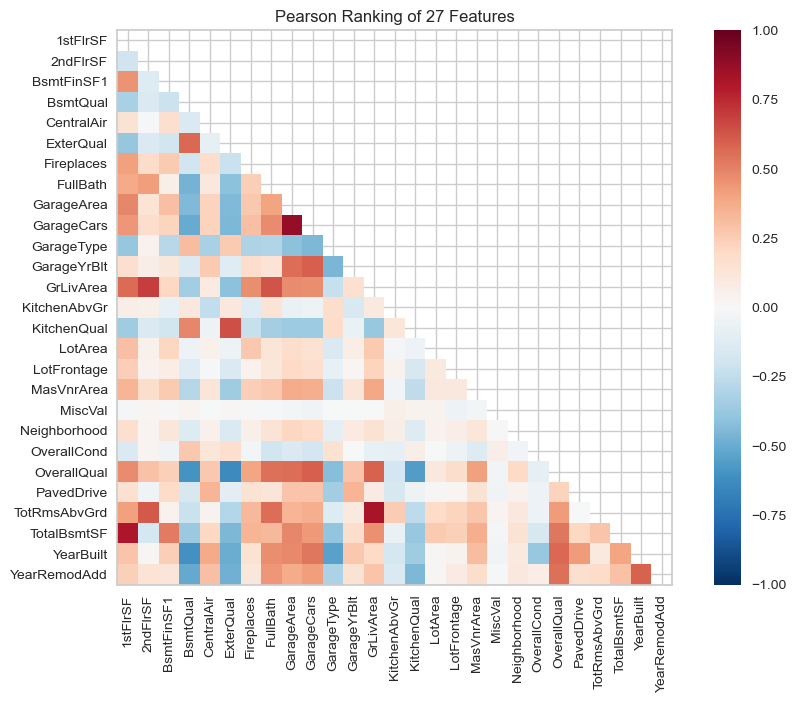

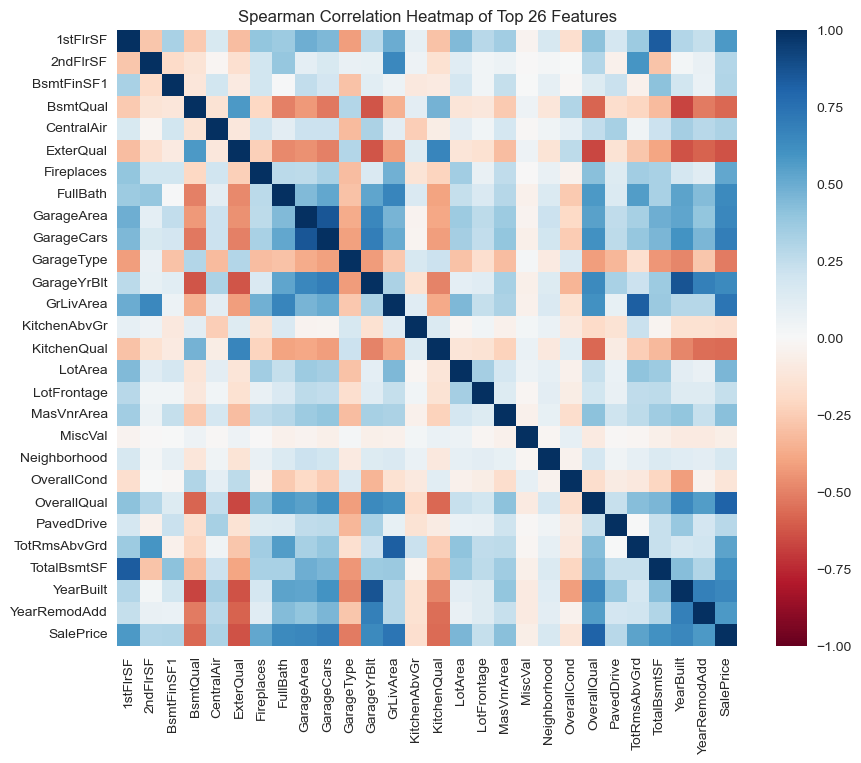

Index(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'CentralAir',
       'ExterQual', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageType', 'GarageYrBlt', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'LotArea', 'LotFrontage', 'MasVnrArea', 'MiscVal', 'Neighborhood',
       'OverallCond', 'OverallQual', 'PavedDrive', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

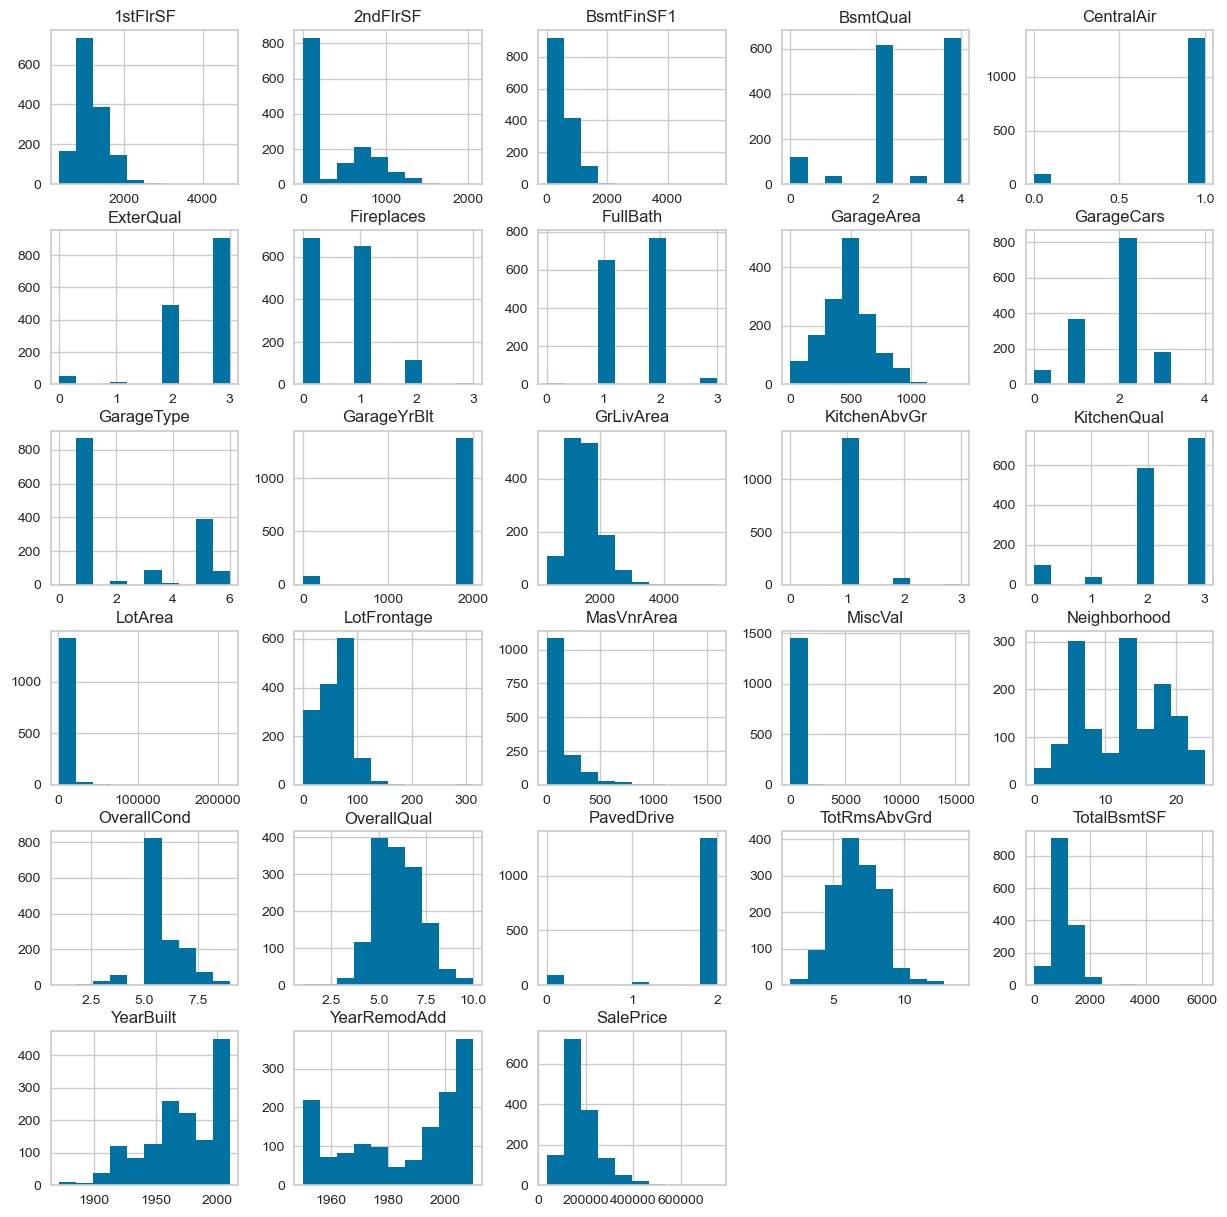

In [46]:
#EDA on top 26 features 
#scaled_df is the dataframe that produces x0 and y0 which are the encoded and scaled dfs used throughout the notebook
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm


#Rank2D

top26featuresls = pivottopfeatures.index.tolist()
visualizer = Rank2D(algorithm='pearson', features = top26featuresls,  size=(1080, 720))
visualizer.fit(x0[top26featuresls], y0)
visualizer.transform(x0[top26featuresls])
visualizer.show()

top26featuresls.append('SalePrice')

#top26_df = scaled_df[top26featuresls].copy()
top26_df = encdata[top26featuresls].copy()

#Correlation Matrix
plt.figure(figsize = (10, 8))
plt.title('Spearman Correlation Heatmap of Top 26 Features')
sns.heatmap(top26_df.corr(method='spearman'), cmap='RdBu', vmin=-1, vmax=1, annot=False, fmt='.2f', center=0)
plt.show()


#Basic Histogram for each feature to visualize the distribution
top26_df.hist(figsize = (15,15))

top26_df.columns


## Model Evaluation 1


['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'CentralAir', 'ExterQual', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'MiscVal', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
The Mean Squared Error for the Lasso() is 1.1123446035290037
The Coefficient of Determination for the Lasso() regression is -0.0014293725084046915
The top 15 coefficient scores are:
1stFlrSF        0.0
KitchenQual    -0.0
YearBuilt       0.0
TotalBsmtSF     0.0
TotRmsAbvGrd    0.0
PavedDrive      0.0
OverallQual     0.0
OverallCond    -0.0
Neighborhood    0.0
MiscVal        -0.0
MasVnrArea      0.0
LotFrontage     0.0
LotArea         0.0
KitchenAbvGr   -0.0
2ndFlrSF        0.0
dtype: float64
Prediction Error plot for Lasso


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


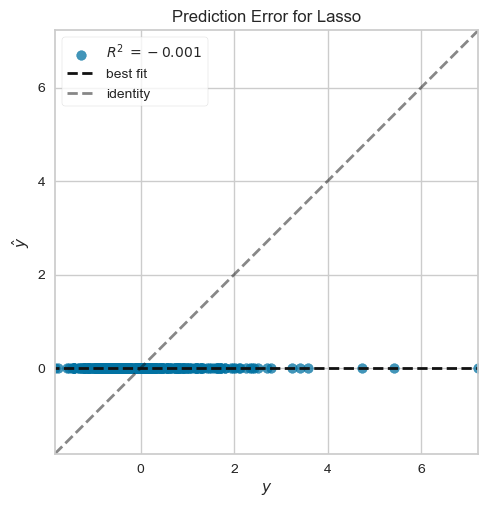

Residuals plot for Lasso


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


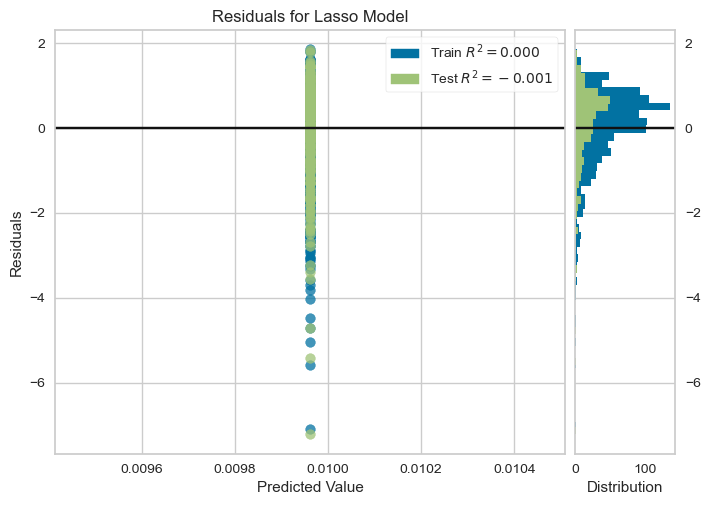

KFold Cross Validation for Lasso


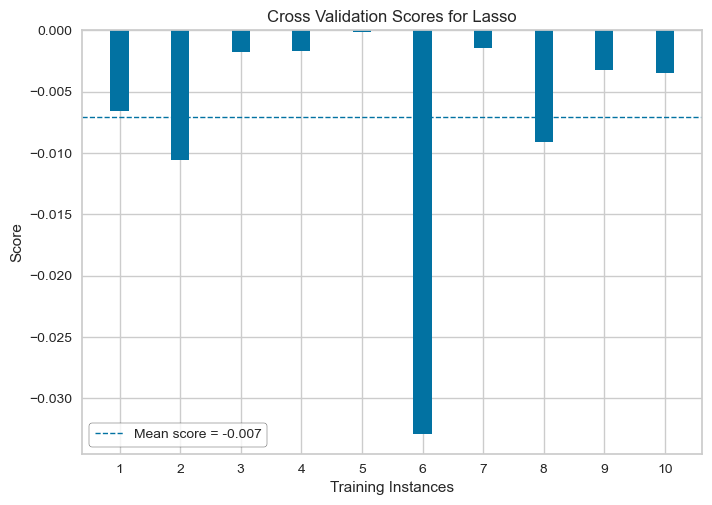

The Mean Squared Error for the Ridge() is 0.17335261818667183
The Coefficient of Determination for the Ridge() regression is 0.843932893545214
The top 15 coefficient scores are:
OverallQual     0.209991
GarageCars      0.148563
1stFlrSF        0.119681
GrLivArea       0.100849
2ndFlrSF        0.091065
YearBuilt       0.088663
TotRmsAbvGrd    0.084513
BsmtFinSF1      0.084067
OverallCond     0.078402
LotArea         0.063365
Fireplaces      0.057568
Neighborhood    0.033079
MasVnrArea      0.030590
TotalBsmtSF     0.019273
GarageArea      0.018478
dtype: float64
Prediction Error plot for Ridge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


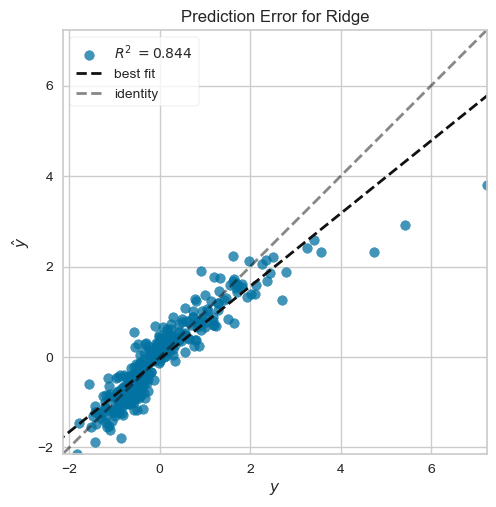

Residuals plot for Ridge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


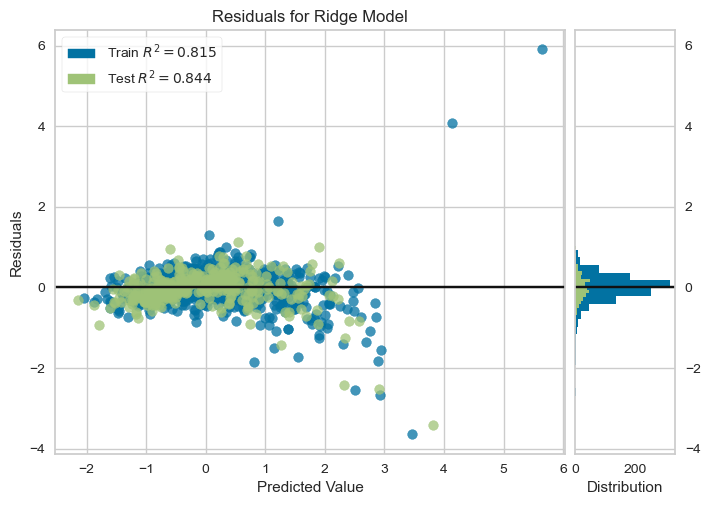

KFold Cross Validation for Ridge


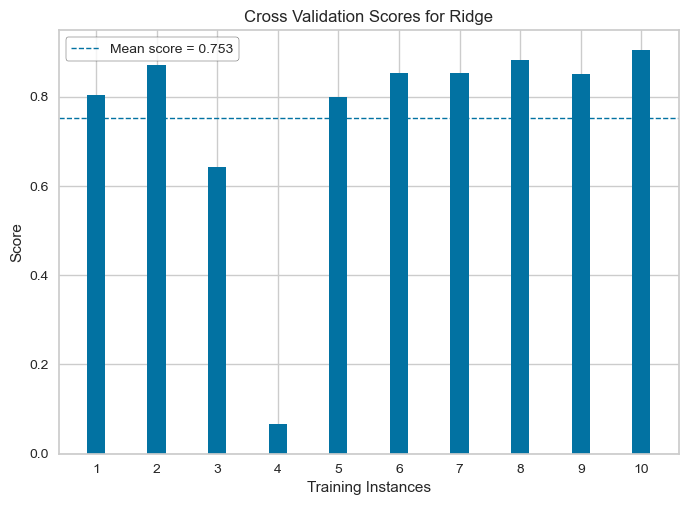

The Mean Squared Error for the BayesianRidge() is 0.17359856391639172
The Coefficient of Determination for the BayesianRidge() regression is 0.8437114718050418
The top 15 coefficient scores are:
OverallQual     0.201473
GarageCars      0.132943
GrLivArea       0.119953
1stFlrSF        0.095449
TotRmsAbvGrd    0.084724
YearBuilt       0.081935
BsmtFinSF1      0.081664
OverallCond     0.073874
2ndFlrSF        0.071065
LotArea         0.062333
Fireplaces      0.060470
MasVnrArea      0.033156
Neighborhood    0.032729
GarageArea      0.029956
TotalBsmtSF     0.027046
dtype: float64
Prediction Error plot for BayesianRidge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


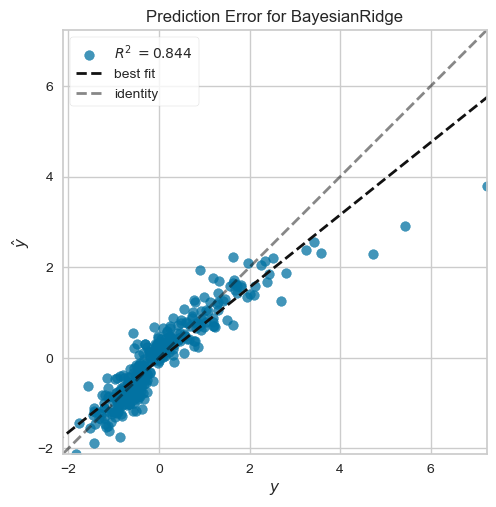

Residuals plot for BayesianRidge


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


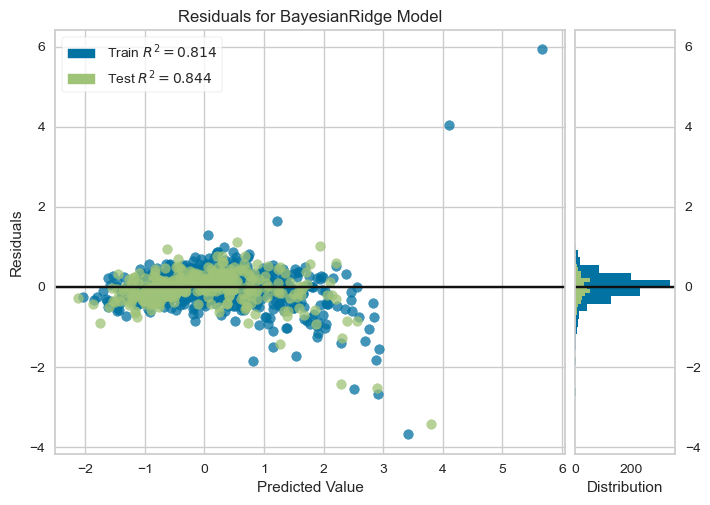

KFold Cross Validation for BayesianRidge


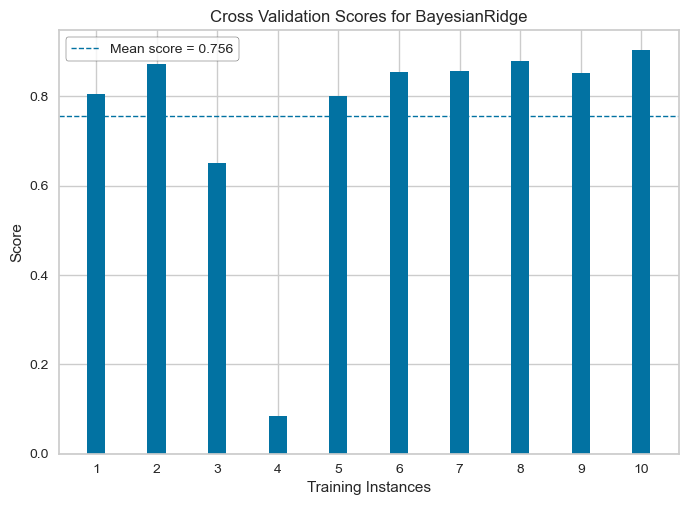

The Mean Squared Error for the KNeighborsRegressor() is 0.18251019581862024
The Coefficient of Determination for the KNeighborsRegressor() regression is 0.8356884455633885
The model KNeighborsRegressor() does not have coefficients.
Prediction Error plot for KNeighbors


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


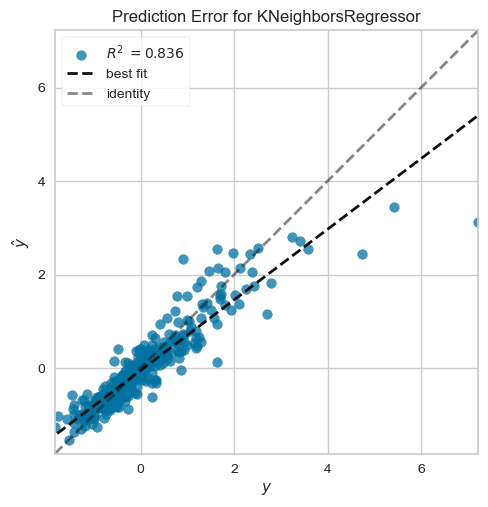

Residuals plot for KNeighbors


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


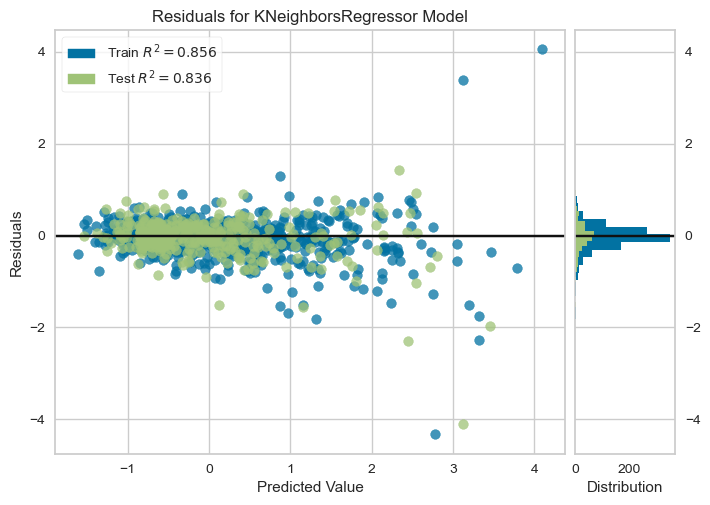

KFold Cross Validation for KNeighbors


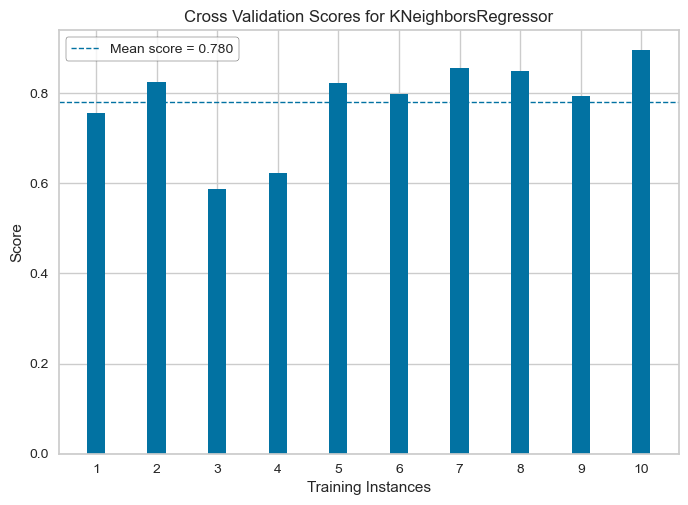

The Mean Squared Error for the RandomForestRegressor() is 0.11124380579084625
The Coefficient of Determination for the RandomForestRegressor() regression is 0.8998486491729816
The model RandomForestRegressor() does not have coefficients.
Prediction Error plot for RandomForestRegressor


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


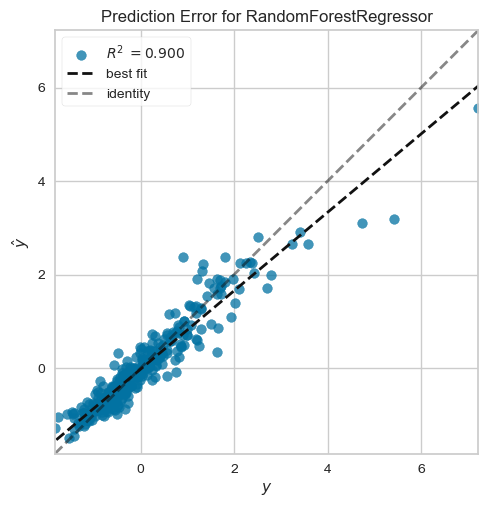

Residuals plot for RandomForestRegressor


C:\Users\Valen\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


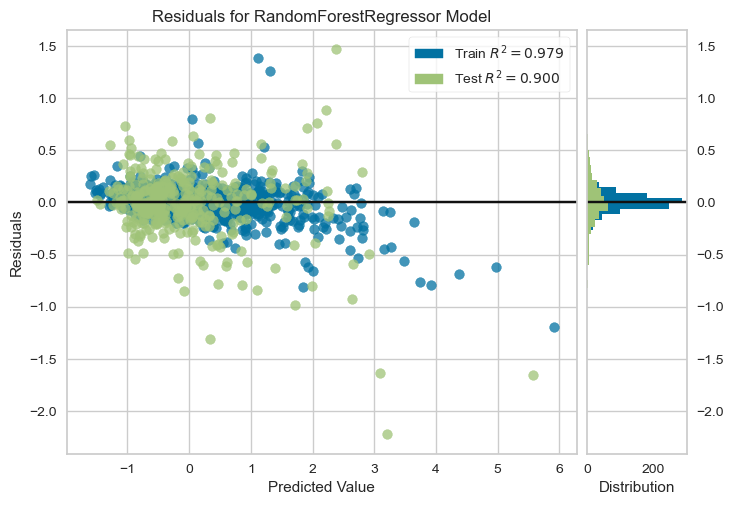

KFold Cross Validation for RandomForestRegressor


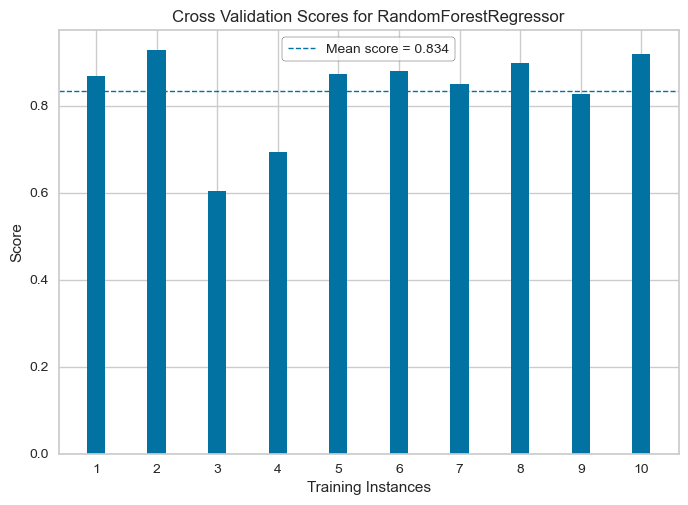

MSE and CoD scores for regressions with top 26 features:
{'Lasso': {'MSE': 1.1123446035290037, 'CoeffDetermination': -0.0014293725084046915}, 'Ridge': {'MSE': 0.17335261818667183, 'CoeffDetermination': 0.843932893545214}, 'BayesianRidge': {'MSE': 0.17359856391639172, 'CoeffDetermination': 0.8437114718050418}, 'KNeighbors': {'MSE': 0.18251019581862024, 'CoeffDetermination': 0.8356884455633885}, 'RandomForestRegressor': {'MSE': 0.11124380579084625, 'CoeffDetermination': 0.8998486491729816}}
MSE and CoD scores for regressions with top 80 features:
{'Lasso': {'MSE': 1.1123446035290037, 'CoeffDetermination': -0.0014293725084046915}, 'Ridge': {'MSE': 0.1738028586545523, 'CoeffDetermination': 0.8435275479105995}, 'BayesianRidge': {'MSE': 0.1675061162103326, 'CoeffDetermination': 0.849196423198668}, 'KNeighbors': {'MSE': 0.24467100489781018, 'CoeffDetermination': 0.779725877998179}, 'RandomForestRegressor': {'MSE': 0.11697422491882616, 'CoeffDetermination': 0.8946896273974123}}


In [107]:

top26featuresls2 = top26featuresls.copy()
top26featuresls2.remove('SalePrice')

print(top26featuresls2)

#models dictionary from original regressions for comparison
models = {'Lasso':Lasso(), 'Ridge': Ridge(),'BayesianRidge': BayesianRidge(), 
          'KNeighbors':KNeighborsRegressor(), 'RandomForestRegressor': RandomForestRegressor() }


scores26vars = {}
for k, v in models.items():
    #Run Regressions and store mse and CoD of this the models testing the top 26 features as opposed to 80
    scores_dict = regressions(v, k, Xtrain0[top26featuresls2], Xtest0[top26featuresls2], ytrain0, ytest0)
    scores26vars[k] = scores_dict
    modelEval(v, k, Xtrain0[top26featuresls2], Xtest0[top26featuresls2], ytrain0, ytest0)

print('MSE and CoD scores for regressions with top 26 features:')
print(scores26vars)
print('MSE and CoD scores for regressions with top 80 features:')
print(scores80vars)
##Need to collect and tabulate model evaluation scores for each model for each trial



## Model Tuning: Recursive Feature Elimination with Cross Validation


In [121]:
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

modelsnoKNN = {'Lasso':Lasso(), 'Ridge': Ridge(),'BayesianRidge': BayesianRidge(), 
             'RandomForestRegressor': RandomForestRegressor() }
cv = KFold(n_splits = 10)

for key, reg in modelsnoKNN.items():
    recursiveFE = RFECV(estimator=reg,
                        cv=cv,
                        scoring="neg_mean_squared_error",
                        min_features_to_select=9)
   # try:
    recursiveFE.fit(x0[top26featuresls2], y0)
    print(f'The optimal number of features for the {key} Model is {recursiveFE.n_features_}')
    Selectedfeatures = (x0[top26featuresls2].columns[recursiveFE.support_]).tolist()
    print(Selectedfeatures)
#Get MSE + Cod Scores for regs for which we can use RFECV + find optimal number
    model =reg
    model_name = key
    model.fit(Xtrain0[Selectedfeatures], ytrain0)
    CoD = model.score(Xtest0[Selectedfeatures], ytest0)
    ypred = model.predict(Xtest0[Selectedfeatures])
    mse = mean_squared_error(ytest0, ypred)
    scoresls = {'MSE': mse, 'CoeffDetermination': CoD}
    print(f'Scores for {model_name} with selected features from RFECV: {scoresls}')
   # except ValueError:
        #KNN does not inherently support coef_scores or importance scores. Flush them out with permutation_importance
        #model = reg.fit(Xtrain0[top26featuresls2], ytrain0) ##Writing code to get the optimal number of features without coef or feature importances
                                                            #is tricky. skipping 
        #Loadint takes too long with KNN, removing this part.
        #permscores = permutation_importance(model, Xtest0[top26featuresls2], ytest, n_repeats=10, random_state=42)
        #print(f'The {key} model does not support coef scores or feature importances to run through RFECF')




The optimal number of features for the Lasso Model is 9
['MiscVal', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
Scores for Lasso with selected features from RFECV: {'MSE': 1.1123446035290037, 'CoeffDetermination': -0.0014293725084046915}
The optimal number of features for the Ridge Model is 19
['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'ExterQual', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'LotArea', 'MasVnrArea', 'Neighborhood', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']
Scores for Ridge with selected features from RFECV: {'MSE': 0.1712127764408417, 'CoeffDetermination': 0.8458593652249393}
The optimal number of features for the BayesianRidge Model is 19
['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'ExterQual', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'LotArea', 'MasVnrArea', 

# Conclusion

We noticed that when only the 10 most important features were used for the predictive model, the models overall performed worse according to MSE and Coef of Determination scores. (the MSA scores increased, while the COef of Determination scores decreased.)

This implies a simpler model may not be the most fitting.

Increasing the number of features used by 'ORank' (overall rank) showed to improve the fitting score of the model.

# Quality of the regression when grouped columns are compressed

In [53]:
#create new binary columns for basement, porch, pool, garage
# missing values were replaced with 'Not Applicable' and 0 for object and numeric features respectively. 
#features used for determining whether a house had the amenity: 
#Basement will be determined by BsmtQual 
#Garage will be determined by GarageQual
#Pool will be determined by PoolQC
#Porch will be determined by counting where all features = 0

#reuse the following to index new porch feature:
#Count of houses without porch:
noporch = ((Raw_data['OpenPorchSF'] == 0) & 
           (Raw_data['EnclosedPorch'] == 0) & 
           (Raw_data['ScreenPorch'] == 0) & 
           (Raw_data['3SsnPorch'] == 0)).sum()

#create new columns 
    
Raw_data['Basement'] = np.where(Raw_data['BsmtQual'] == 'Not Applicable', 1, 0).astype('int64')
Raw_data['Garage'] = np.where(Raw_data['GarageQual'] == 'Not Applicable', 1, 0).astype('int64')
Raw_data['Pool'] = np.where(Raw_data['PoolQC'] == 'Not Applicable', 1, 0).astype('int64')
Raw_data['Porch'] = np.where((Raw_data['OpenPorchSF'] == 0)  & 
           (Raw_data['EnclosedPorch'] == 0) & 
           (Raw_data['ScreenPorch'] == 0) & 
           (Raw_data['3SsnPorch'] == 0), 1, 0).astype('int64')
    

#list of cols to remove
popcols = []
for group in Grouped_features:
    for col in group:
        popcols.append(col)
print('Columns removed from original data:')
print(popcols)

#cdata stands for compressed data, indicating that all the Grouped_features are 
cdata = Raw_data.drop(columns = popcols)

print('VALUE COUNTS FOR NEW BINARY COLUMNS')
for col in ['Basement', 'Garage', 'Pool', 'Porch']:
    print(cdata[col].value_counts())

print('New set of features for regression:')
print(cdata.columns)

Columns removed from original data:
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolArea', 'PoolQC', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
VALUE COUNTS FOR NEW BINARY COLUMNS
Basement
0    1423
1      37
Name: count, dtype: int64
Garage
0    1379
1      81
Name: count, dtype: int64
Pool
1    1453
0       7
Name: count, dtype: int64
Porch
0    1002
1     458
Name: count, dtype: int64
New set of features for regression:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exte

In [54]:
#consider standardizing values for liniear regression testing https://www.linkedin.com/learning/python-statistics-essential-training-19258005/standardizing-values?autoSkip=true&resume=false&u=57879737
#consider xgboost
Xc = cdata.assign(**cdata.select_dtypes('object').astype('category')).drop(columns = 'SalePrice')
yc = cdata.SalePrice

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, random_state = 42)

regc = xgb.XGBRegressor(enable_categorical = True, tree_method='hist')
regc.fit(Xc_train, yc_train)
regc.score(Xc_test, yc_test)

# the score is lower with the compressed dataset. 


0.8808262423770044

# Start here for k-best analysis

## K-Best Decision Tree to narrow down model features

SelectKBest is a feature selection method, not a classifier. It selects a subset of features based on a scoring function, but it doesn't provide a way to directly get feature importances like tree-based models do. However, you can inspect the selected features by looking at the indices or the mask of the selected features:

## RandomeForest

## RidgeClassifier 
does not have a feature_importances_ attribute. Ridge regression is a linear model, and while the coefficients of the model can provide insights into the importance of each feature, it doesn't have a feature_importances_ attribute in the way tree-based models do. You can access the coefficients directly, and they can be interpreted as a measure of feature importance in linear models:

## kings County Dataset

In [61]:
kingsdata0 = pd.read_csv('kingscountydata.csv', sep = ',')
kingsdata0.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
#kingsdata0.isna().any()     #shows no missing values
kingsdata0.dtypes.sort_values()
# Need to convert date to date integer
#kingsdata0['date'] = kingsdata0['date'].str[:-7]

kingsdata0['date'] = pd.to_datetime(kingsdata0['date']) 
#Kbest does not like working with dateime. need to parse date time into separate columns. 
#will only use month and year since Ames does not have day of the month


kingsdata0['yrsold'] = kingsdata0['date'].dt.year
kingsdata0['mosold'] = kingsdata0['date'].dt.month

print( kingsdata0.head())

           id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_basement  yr_built  yr_renovated  \
0     1.0           0     0  ...              0      1955             0   
1     2.0           0     0  ...            400      1951          1991   
2     1.0           0     0  ...              0      1933             0   
3     1.0           0     0  ...            910      1965             0   
4     1.0           0     0  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  yrsold  mos

In [63]:

from sklearn.feature_selection import SelectKBest

Xkings = kingsdata0.drop(columns = ['price', 'date'])
ykings = kingsdata0['price']

kingsbest = SelectKBest(k=15)
kingsvars = kingsbest.fit_transform(Xkings, ykings)
print(kingsvars)


kingsKBscore = kingsbest.scores_
kingsfeatures = kingsbest.get_support(indices = True)

for i in kingsfeatures:
    print(f'\n{Xkings.columns[i]}: {kingsKBscore[i]}')

[[3.00000e+00 1.00000e+00 1.18000e+03 ... 9.81780e+04 4.75112e+01
  1.34000e+03]
 [3.00000e+00 2.25000e+00 2.57000e+03 ... 9.81250e+04 4.77210e+01
  1.69000e+03]
 [2.00000e+00 1.00000e+00 7.70000e+02 ... 9.80280e+04 4.77379e+01
  2.72000e+03]
 ...
 [2.00000e+00 7.50000e-01 1.02000e+03 ... 9.81440e+04 4.75944e+01
  1.02000e+03]
 [3.00000e+00 2.50000e+00 1.60000e+03 ... 9.80270e+04 4.75345e+01
  1.41000e+03]
 [2.00000e+00 7.50000e-01 1.02000e+03 ... 9.81440e+04 4.75941e+01
  1.02000e+03]]

bedrooms: 1.6793574852347255

bathrooms: 3.5588452601153926

sqft_living: 7.347197973294686

floors: 1.585509130620107

waterfront: 2.6941907736854263

view: 2.4394085346995866

condition: 1.0675273631726125

grade: 6.9263357453882

sqft_above: 5.025808751317449

sqft_basement: 1.9017676038925206

yr_built: 1.2518499275157426

yr_renovated: 1.2656670326151558

zipcode: 1.0764209195435814

lat: 3.191478105515423

sqft_living15: 5.17674944723183
